## Importing the required packages

In [4]:
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, Input, MaxPooling2D

import matplotlib.pyplot as plt

## Calling the ImageDataGenerator()
Train, val and test variables have been created as a usable "copy" of the images from the dataset.

In [5]:
# create a new generator
imagegen = ImageDataGenerator()

# load train data
train = imagegen.flow_from_directory("Dataset/train/", class_mode="categorical", shuffle=False, batch_size=128)

# load val data
val = imagegen.flow_from_directory("Dataset/val/", class_mode="categorical", shuffle=False, batch_size=128)

# Load test data
test = imagegen.flow_from_directory("Dataset/test/", class_mode = "categorical", shuffle = False, batch_size = 128)

Found 1022 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


## The CNN Model



Epoch 1/30
8/8 [==============================] - 162s 20s/step - loss: 33307.7301 - accuracy: 0.7114 - val_loss: 35051.6836 - val_accuracy: 0.5545
Epoch 2/30
8/8 [==============================] - 112s 14s/step - loss: 4304.1783 - accuracy: 0.5020 - val_loss: 2683.4006 - val_accuracy: 0.6182
Epoch 3/30
8/8 [==============================] - 109s 14s/step - loss: 4551.5254 - accuracy: 0.7857 - val_loss: 2345.1807 - val_accuracy: 0.6545
Epoch 4/30
8/8 [==============================] - 109s 14s/step - loss: 714.8222 - accuracy: 0.7133 - val_loss: 2178.2805 - val_accuracy: 0.6727
Epoch 5/30
8/8 [==============================] - 110s 14s/step - loss: 1790.9852 - accuracy: 0.8268 - val_loss: 460.9564 - val_accuracy: 0.8364
Epoch 6/30
8/8 [==============================] - 110s 14s/step - loss: 361.4607 - accuracy: 0.8434 - val_loss: 640.0470 - val_accuracy: 0.8182
Epoch 7/30
8/8 [==============================] - 111s 14s/step - loss: 587.6668 - accuracy: 0.8102 - val_loss: 365.8239 - v

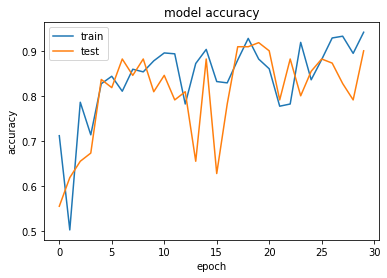

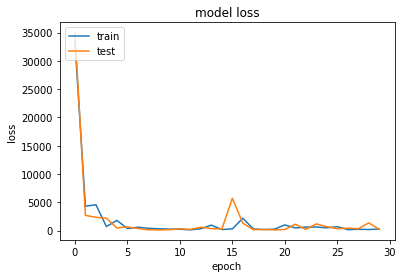

In [3]:
input_img = Input(shape = (256, 256, 3))

tower_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(10, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(10, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(10, (1,1), padding='same', activation='relu')(tower_3)
output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)
output = Flatten()(output)
out    = Dense(2, activation='softmax')(output)
model = Model(inputs = input_img, outputs = out)

# compile model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fit on data for 20 epochs
history = model.fit_generator(train, epochs=20, validation_data=val)

# model summary
model.summary()

(eval_loss4, eval_accuracy4) = model.evaluate(val, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy4 * 100)) 
print("[INFO] Loss: {}".format(eval_loss4)) 

## Accuracy and Loss graph

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()